<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E5%AF%8C%E5%A3%AB%E5%B1%B1%E4%B8%8B%E5%B1%B1%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・数式演算ライブラリのNumPyに慣れる

・勾配降下法の仕組みを知る

どのように学ぶか

勾配降下法を下山のたとえた問題を解くプログラムを作成することで、機械学習の基礎的な要素を学びます。

In [1]:
import numpy as np
csv_path = "/content/drive/MyDrive/DIC/mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130 : 140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。


この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

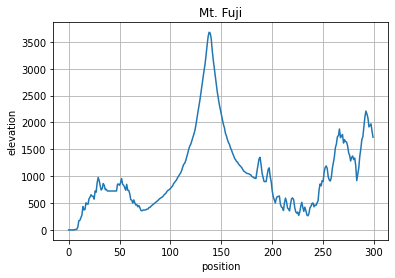

In [4]:
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji[:, 0], fuji[:, 3])
plt.grid()
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。



In [5]:
print(fuji.shape)

(300, 5)


In [6]:
def where_now(number_of_the_point, elevation):
  """
  今いる地点の番号と今いる隣の地点の番号を使い勾配を計算する関数
    Parameters
    ----------------
    number_of_the_point : int or float
      今いる地点の情報
    elevation : int or float
      標高
    Returns
    ----------------
    gradient : ndarray, shape(n-1,)
    　　　　今いる地点の勾配。差をとるため要素は1つ減る
    """
  #print(number_of_the_point)
  #print(len(elevation))
  #print(type(elevation))
  gradient = elevation[number_of_the_point] - elevation[number_of_the_point -1] / (number_of_the_point - (number_of_the_point - 1))

  return gradient

In [7]:
# 仮に136番地点(問題４より)だった場合
number_of_the_point = 136
elevation = fuji[:, 3]

In [8]:
print(where_now(number_of_the_point, elevation))

168.35000000000036


In [9]:
# 同じ引数のままで、引数にndarrayを渡すと
number_of_the_point = np.array([135, 136, 137])
elevation = fuji[:, 3]
print("{}の地点の勾配は{}".format(number_of_the_point, where_now(number_of_the_point, elevation)))

[135 136 137]の地点の勾配は[178.43 168.35 165.49]


【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [10]:
def where_next(number_of_the_point, elevation, alpha = 0.2):
  """
  今いる地点の勾配の情報を元に、次に移動する先の地点を計算する関数
    Parameters
    ----------------
    number_of_the_point : int
      今いる地点
    elevation : int or float
      標高
    alpha : int or float
　　　　　　　　　　学習率(α)
    Returns
    ----------------
    next_point_int : numpy.int
    　　　今いる地点の勾配。差をとるため要素は1つ減る
  """
  # 公式に当てはめ
  next_point = number_of_the_point - alpha * where_now(number_of_the_point, elevation)
  # ここからは、有り得ない値となった場合の処理
  # 範囲より小さい値を範囲内に収まるようにする
  next_point = np.maximum(1, next_point)
  # 範囲より大きい値を範囲内に収まるようにする
  next_point = np.minimum(len(elevation) -1, next_point)
  # 地点を整数で表すためにroundする。
  next_point_int = np.round(next_point).astype(np.int)

  return next_point_int

In [11]:
# 仮に136番地点(問題4より)だった場合
number_of_the_point = 136
elevation = fuji[:, 3]
next_point = where_next(number_of_the_point, elevation, alpha = 0.2)
print("{}地点に移動する".format(next_point))

102地点に移動する


In [12]:
# 同じ引数のままで、引数にndarrayを渡すと
# number_of_the_point = np.array([135, 136, 137])
# elevation = fuji[:, 3]
# next_point = where_next(number_of_the_point, elevation, alpha = 0.2)
# print("{}地点に移動する".format(next_point))

《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》


機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

【問題4】山を下る関数を作成

山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [13]:
def downhill(starting_point, elevation, alpha = 0.2):
  """
  下山する過程を計算する関数
    Parameters
    ----------------
    starting_point : int
      今いる地点
    elevation : int or float
      標高
    alpha : int or float
　　　　　　　　　　学習率(α)
    Returns
    ----------------
    through_list : list of int
    　　　　下山中に通った地点のリスト
  """
  # 下山中に通った地点のリストを作成し、初期値を入れる
  through_list = [starting_point]

  # 過去に通ったところを再び通ったらwhileのループ処理から抜ける
  while through_list[-1] not in through_list[:-1]:
    through_list.append(where_next(through_list[-1], elevation, alpha = 0.2))
    
    #print(through_list[-1], through_list[:-1])

  return through_list[:-1]

In [14]:
# 136番地点からスタート
starting_point = 136
elevation = fuji[:, 3]
list_till_goal = downhill(starting_point, elevation, alpha = 0.2)
print("{}地点に移動する".format(list_till_goal))

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]地点に移動する


【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》


・断面図の中に移動した地点を点で表示する

・繰り返し毎の標高や勾配を折れ線グラフにする

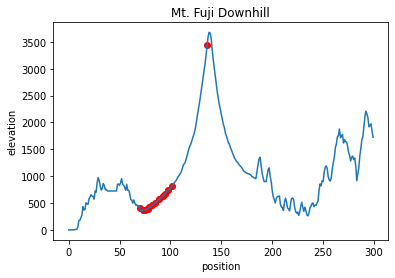

In [15]:
# 断面図の中に移動した地点を点で表示する→散布図で表現する
elevation = fuji[:, 3]
moved_elevation = elevation[list_till_goal]

plt.title("Mt. Fuji Downhill")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(list_till_goal, moved_elevation, color = 'red')
plt.plot(elevation)
plt.show()

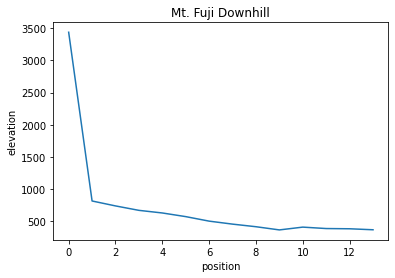

In [16]:
# 繰り返し毎の標高や勾配を折れ線グラフにする→プロット図で表現する
elevation = fuji[:, 3]
moved_elevation = elevation[list_till_goal]

plt.title("Mt. Fuji Downhill")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(moved_elevation)
plt.show()

【問題6】初期値の変更

問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということです。

In [24]:
starting_point = 136
elevation = fuji[:, 3]
# for文で地点を更新して全ての点で計算し、結果を入れるためのリストを作成
change_of_initial = []

for departure_point in range(1, 300):
  change_of_initial.append(downhill(departure_point, elevation, alpha = 0.2))

len(change_of_initial)

299

【問題7】初期値ごとの下山過程の可視化

問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。

《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

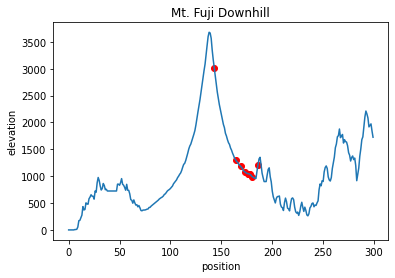

In [25]:
# 富士山の反対側（テキストで例示されている142を用いる)から下山した場合を表現する
plt.title("Mt. Fuji Downhill")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_of_initial[142], fuji[:, 3][change_of_initial[142]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更

ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [30]:
starting_point = 136
elevation = fuji[:, 3]
# ハイパーパラメータである学習率を変化させるため引数にndarrayを渡す
alphas = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1])
# for文で地点を更新して全ての点で計算し、結果を入れるためのリストを作成
change_value_alpha = []

for alpha in alphas:
  change_value_alpha.append(downhill(starting_point, elevation, alpha = alphas))

len(change_value_alpha)

8

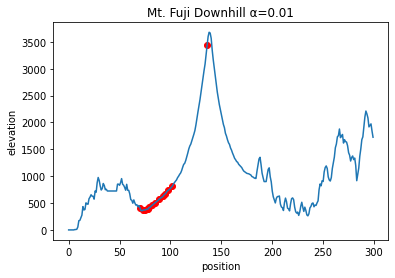

In [31]:
# α=0.01の場合を表現する
plt.title("Mt. Fuji Downhill α=0.01")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[0], fuji[:, 3][change_value_alpha[0]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

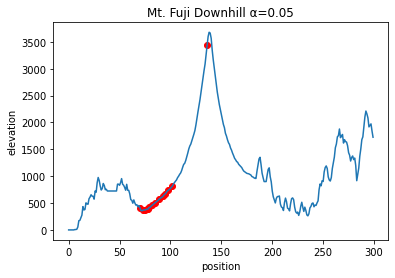

In [32]:
# α=0.05の場合を表現する
plt.title("Mt. Fuji Downhill α=0.05")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[1], fuji[:, 3][change_value_alpha[1]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

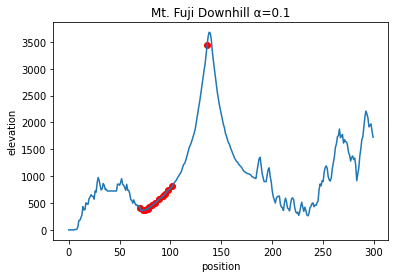

In [33]:
# α=0.1の場合を表現する
plt.title("Mt. Fuji Downhill α=0.1")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[2], fuji[:, 3][change_value_alpha[2]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

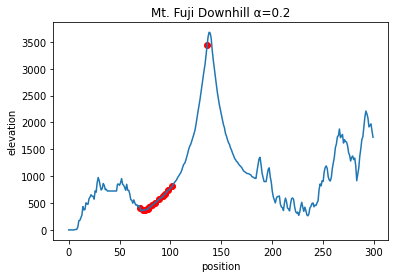

In [34]:
# α=0.2の場合を表現する
plt.title("Mt. Fuji Downhill α=0.2")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[3], fuji[:, 3][change_value_alpha[3]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

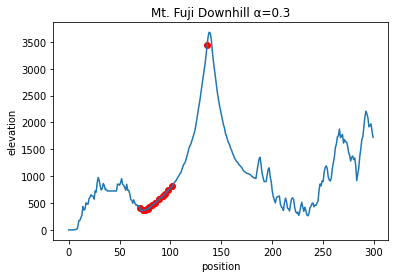

In [35]:
# α=0.3の場合を表現する
plt.title("Mt. Fuji Downhill α=0.3")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[4], fuji[:, 3][change_value_alpha[4]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

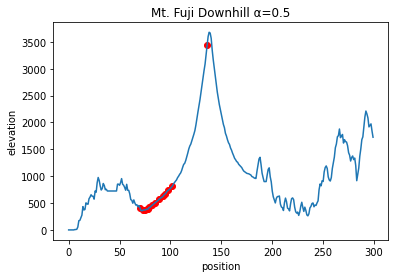

In [36]:
# α=0.5の場合を表現する
plt.title("Mt. Fuji Downhill α=0.5")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[5], fuji[:, 3][change_value_alpha[5]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

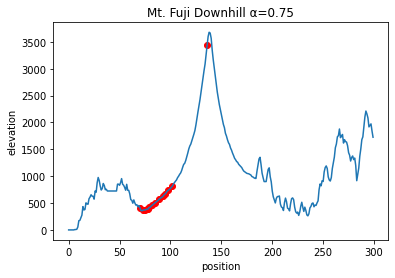

In [37]:
# α=0.75の場合を表現する
plt.title("Mt. Fuji Downhill α=0.75")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[6], fuji[:, 3][change_value_alpha[6]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

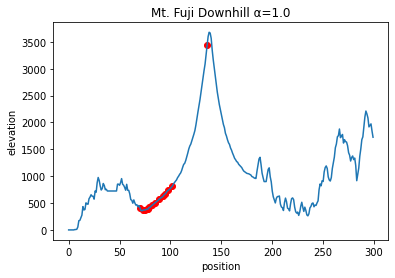

In [38]:
# α=1.0の場合を表現する
plt.title("Mt. Fuji Downhill α=1.0")
plt.xlabel("position")
plt.ylabel("elevation")
plt.scatter(change_value_alpha[-1], fuji[:, 3][change_value_alpha[-1]], color = 'red')
plt.plot(fuji[:, 3])
plt.show()

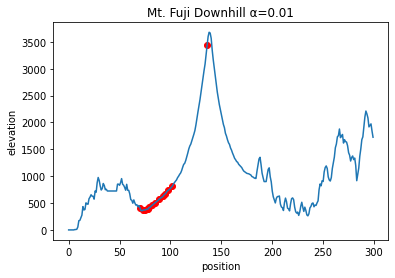

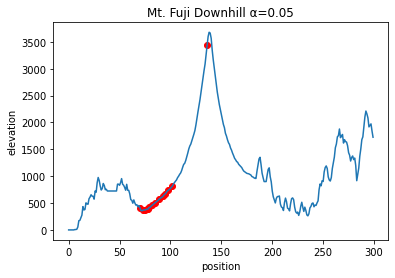

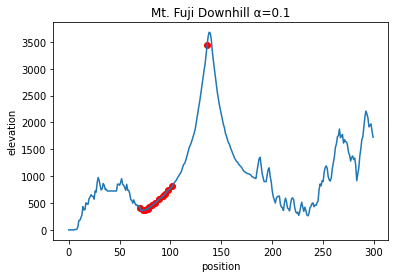

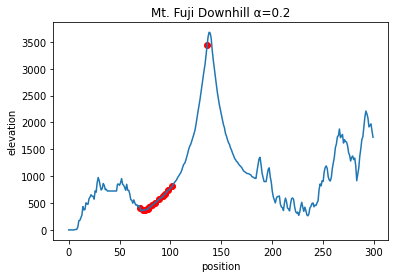

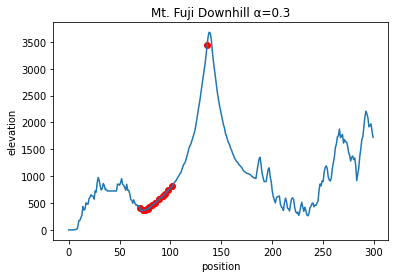

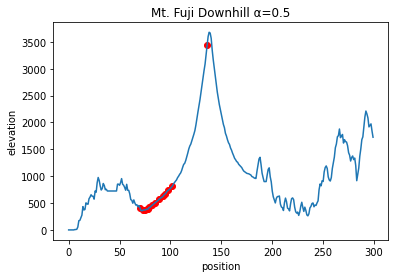

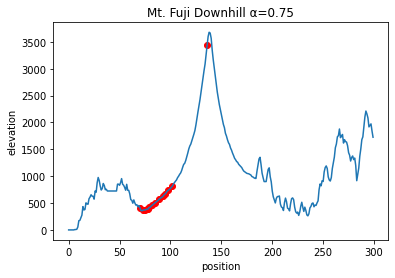

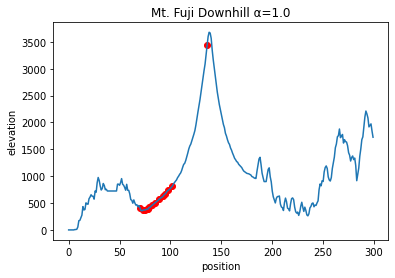

In [39]:
# αの各値の場合を表現する(for文で効率化できないか試みたß)
for i, alpha in enumerate(alphas):
  plt.title("Mt. Fuji Downhill α={}".format(alpha))
  plt.xlabel("position")
  plt.ylabel("elevation")
  plt.scatter(change_value_alpha[i], fuji[:, 3][change_value_alpha[i]], color = 'red')
  plt.plot(fuji[:, 3])
  plt.show()